In [17]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from pydub import AudioSegment
import numpy as np

In [18]:
"""Read in the rain audio file"""
file_name = "Pufino - Enjoy.mp3"

def mp3_to_array(mp3_filepath):
    """
    Reads an MP3 file and returns its content as a NumPy array.

    Args:
        mp3_filepath (str): The path to the MP3 file.

    Returns:
        tuple: A tuple containing the sample rate and a NumPy array of audio data.
               Returns (None, None) if an error occurs during file processing.
    """
    try:
        audio = AudioSegment.from_mp3(mp3_filepath)
        audio_array = np.array(audio.get_array_of_samples())
        
        # If the audio is stereo, reshape the array
        if audio.channels == 2:
            print("Stereo audio detected.")
            audio_array = audio_array.reshape((-1, 2))
        
        return audio.frame_rate, audio_array
    except Exception as e:
         print(f"Error processing file: {e}")
         return None, None

# Define variables for use
sample_rate, audio_data = mp3_to_array(file_name)

if sample_rate is not None and audio_data is not None:
    print(f"Sample Rate: {sample_rate} Hz")
    print(f"Audio Data Array Shape: {audio_data.shape}")
    print(f"Audio Data Array: {audio_data}")
else:
    print("Failed to read audio data.")

Stereo audio detected.
Sample Rate: 44100 Hz
Audio Data Array Shape: (6614999, 2)
Audio Data Array: [[ 0  0]
 [ 1  0]
 [ 0 -1]
 ...
 [ 0  0]
 [ 0  0]
 [ 0  0]]


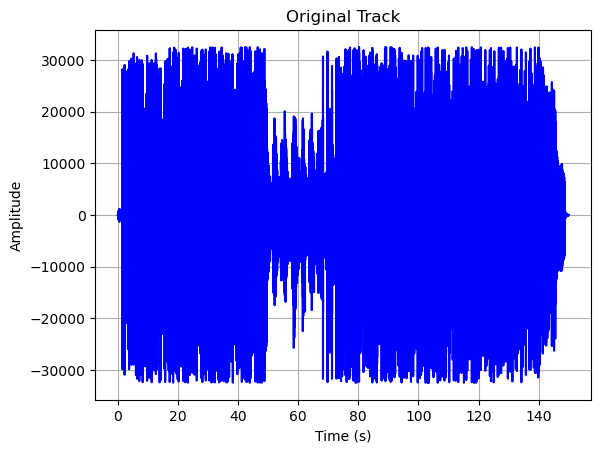

In [19]:
"""Graph the original rain audio file"""

samples = audio_data.shape[0]  # number of samples in the audio data
audio_data_half = audio_data[:,0]  # take one channel if stereo
duration = samples / sample_rate  # duration of the audio in seconds

t = np.linspace(0, duration, samples)  # time vector

plt.figure()
plt.plot(t, audio_data_half, color='blue')
plt.title("Original Track")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

In [20]:
# Play only a few seconds of the original sound
index_to_play = 3 * sample_rate  # 3 seconds into the audio
sd.play(audio_data_half[:index_to_play], sample_rate)
sd.wait()

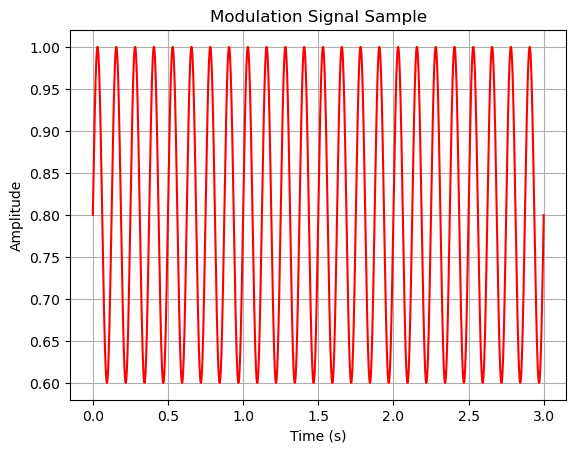

In [21]:
"""Define the modulation signal"""

# Modulation parameters
fmod = 8 # frequency of modulation in Hz
modlevel = 0.4 # intensity of the modulation effect (0 to 1)
m = (modlevel / 2) * np.sin(2 * np.pi * fmod * t) + (1 - modlevel / 2)

index_to_represent = 3 * sample_rate  # 3 seconds

plt.figure()
plt.plot(t[:index_to_represent], m[:index_to_represent], color='red')
plt.title("Modulation Signal Sample")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

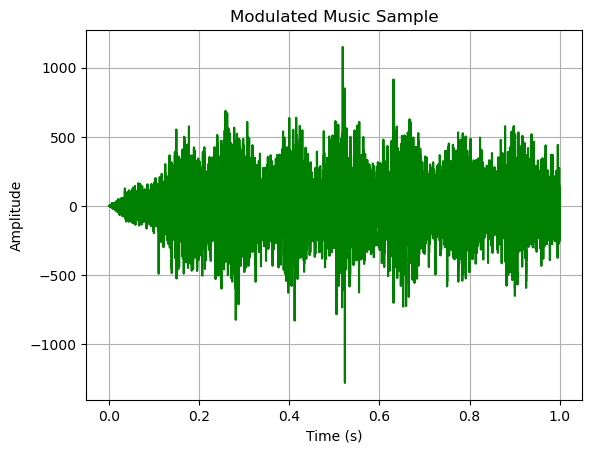

In [22]:
"""Apply the modulation to the rain sound"""

modulated_rain = audio_data_half * m
modulated_rain = modulated_rain.astype(np.int16)  # Convert to int16 for playback

index_to_represent = 1 * sample_rate  # The number of samples to graph

plt.figure()
plt.plot(t[:index_to_represent], modulated_rain[:index_to_represent], color='green')
plt.title("Modulated Music Sample")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

In [23]:
# Play only a few seconds of the new modulated sound
index_to_play = 3 * sample_rate  # 3 seconds into the audio
sd.play(modulated_rain[:index_to_play], sample_rate)
sd.wait()

In [24]:
"""Export the new modulated sound to an MP3 file"""

# Step 1: Convert NumPy array to AudioSegment
audio = AudioSegment(
    modulated_rain.tobytes(),              # raw PCM bytes
    frame_rate=44100,               # sample rate
    sample_width=2,                 # 2 bytes for int16
    channels=1                      # mono
)

# Step 2: Export to MP3
file_name = file_name.split(".")[0]  # Remove the file extension
audio.export(f"Modulated {file_name} {fmod}Hz @ {modlevel} Intensity.mp3", format="mp3")

<_io.BufferedRandom name='Modulated Pufino - Enjoy 8Hz @ 0.4 Intensity.mp3'>